In [24]:
!pip install kaggle

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d kazanova/sentiment140

!unzip sentiment140.zip

Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None)
df = df[[0, 5]]
df.columns = ["sentiment", "text"]
df['sentiment'] = df['sentiment'].replace({4: 1})

In [27]:
vocab_size = 10000
max_length = 100
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['sentiment'], test_size=0.2, random_state=42)


In [28]:
embedding_dim = 100
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 142s 3ms/step - accuracy: 0.7829 - loss: 0.4575 - val_accuracy: 0.8103 - val_loss: 0.4161
Epoch 2/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 121s 3ms/step - accuracy: 0.8190 - loss: 0.3977 - val_accuracy: 0.8128 - val_loss: 0.4104
Epoch 3/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 142s 3ms/step - accuracy: 0.8355 - loss: 0.3673 - val_accuracy: 0.8094 - val_loss: 0.4199
Epoch 4/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 142s 3ms/step - accuracy: 0.8518 - loss: 0.3365 - val_accuracy: 0.8066 - val_loss: 0.4351
Epoch 5/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 144s 3ms/step - accuracy: 0.8672 - loss: 0.3070 - val_accuracy: 0.8019 - val_loss: 0.4655
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.8020 - loss: 0.4656
Test accuracy: 0.8018500208854675


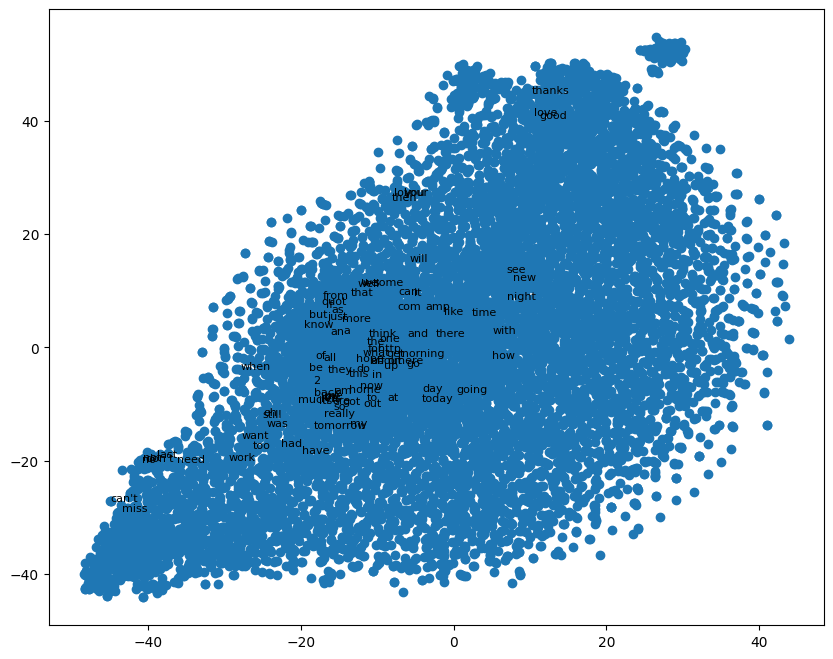

In [29]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(weights)

plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

word_indices = {word: index for word, index in tokenizer.word_index.items() if index < 100}
for word, index in word_indices.items():
  plt.annotate(word, embeddings_2d[index], fontsize=8)
plt.show()